# Understanding principal component analysis 

In this post, we'll take a deep dive into PCA, from both a mathematical and implementation perspective.
We'll derive the equation from the ground up, look at how we can compute it and finally end with what it can be used for.

## Background

## The optimal coding perspective
PCA can be thought of as finding a low-dimensional representation of a vector. Given points in an _n_-dimensional space, we might wish to find some new _m_-dimensional space which captures as much of the _essence_ of the original space as possible but where _m_ < _n_. The exact definition of capturing the _essence_ is subject to design, however, a possible we could proceed by minimisation of the reconstruction error. That is, if we take our low-dimensional representation and attempt to recover the original _n_-dimensional vector, by how much does our reconstruction vary from the original vector. Similarly, this requires the definition of a distance metric by which we can evaluate the error.



## The decorrelation perspective

## The axis transformation perspective

## Relationship with eigendecomposition

## Relationship with singular value decomposition

### Example uses using our implementation from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def generate_noisy_line(gradient, N=100):
    N = 100
    X = np.zeros(shape=(N, 2))
    X[:,0] = np.random.uniform(-100, 100, size=N)
    X[:,1] = (X[:,0]*gradient)+ np.random.uniform(-100, 100, size=N)
    return X
# plt.scatter(x, y)

In [544]:
def pca_eig(X):
    # X = whiten(X)
    N = X.shape[0]
    # eigenvals, eigenvectors = np.linalg.eig(1/N * (X.T @ X))
    eigenvals, eigenvectors = np.linalg.eig((X.T @ X))
    # w, v = np.linalg.eigh((X.T @ X))
    return eigenvals, eigenvectors

def pca_svd(X):
    _,_,x = np.linalg.svd(X)
    return x

def whiten(X):
    return (X-np.mean(X, axis=0))#/np.std(X, axis=0)

[[-0.97274296 -0.23188603]
 [ 0.23188603 -0.97274296]]
[[ 0.23188603  0.97274296]
 [-0.97274296  0.23188603]]


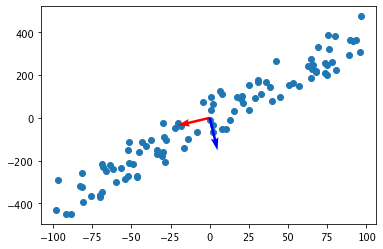

In [545]:
X = generate_noisy_line(4)
_,eig_dec = pca_eig(X)
svd_dec = pca_svd(X)
plt.scatter(X[:,0], X[:,1])
print(eig_dec)
print(svd_dec)
origin = [0,0]
eig_vec1, eig_vec2 = eig_dec[0, :], eig_dec[1,:]
plt.quiver(*origin, *eig_vec1, color=['r'], scale=10)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=10)

In [131]:
from sklearn.decomposition import PCA
fitted = PCA().fit(X)

In [132]:
fitted.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

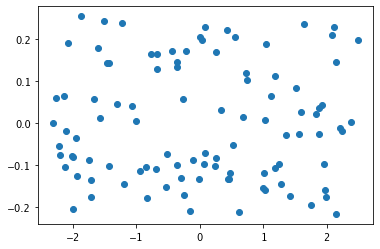

In [142]:
Z = X@D
plt.scatter(Z[:,0], Z[:,1])

In [145]:
_,_,D_prime = np.linalg.svd(X)
print(D_prime)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


### My eigenfaces

In [428]:
from PIL import Image
import glob
dims = (40,60)
images = [Image.open(n).convert("L").resize((dims[0], dims[1])) for n in glob.glob('photos/utkcropped/*.jpg')]
imag_arr = np.zeros(shape=(len(images), dims[0]*dims[1]))
for i in range(len(images)):
    imag_arr[i, :] = np.array(images[i]).reshape(1, dims[0]*dims[1])
# for i in range(1,5):

#     X[i, :] = np.array().reshape(1, dims[0]*dims[1]))

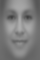

In [429]:
Image.fromarray(np.uint8(np.mean(imag_arr, axis=0)).reshape(dims[1], dims[0]))

In [412]:
imag_arr.shape

(23709, 2400)

In [421]:
np.mean(imag_arr, axis=0).shape

(2400,)

In [426]:
np.array(images[11000])

array([[158, 176, 198, ...,  65,  49,  36],
       [161, 179, 192, ...,  59,  50,  36],
       [172, 182, 191, ...,  73,  49,  37],
       ...,
       [231, 216, 158, ...,  11,  11,  11],
       [230, 228, 175, ...,  11,  11,  11],
       [227, 233, 200, ...,  11,  11,  11]], dtype=uint8)

In [534]:
w,D_eig = pca_eig(imag_arr)
D_eig

array([[-0.01449769,  0.02432601,  0.01800359, ..., -0.0095496 ,
         0.00378682, -0.0024173 ],
       [-0.01410733,  0.02340599,  0.01990105, ...,  0.01513949,
        -0.0005866 ,  0.0055711 ],
       [-0.01403792,  0.0218387 ,  0.02165501, ..., -0.00380578,
         0.0027765 , -0.01516152],
       ...,
       [-0.0173794 ,  0.03519392, -0.01486302, ..., -0.01014144,
        -0.00394835, -0.01333416],
       [-0.01741188,  0.03576593, -0.0135625 , ...,  0.00846473,
         0.00609304,  0.01196844],
       [-0.01748186,  0.03596164, -0.01234977, ..., -0.00232647,
        -0.00425332, -0.00530264]])

In [479]:
D = pca_svd(imag_arr)
D

In [537]:
D_eig

array([[-0.01449769,  0.02432601,  0.01800359, ..., -0.0095496 ,
         0.00378682, -0.0024173 ],
       [-0.01410733,  0.02340599,  0.01990105, ...,  0.01513949,
        -0.0005866 ,  0.0055711 ],
       [-0.01403792,  0.0218387 ,  0.02165501, ..., -0.00380578,
         0.0027765 , -0.01516152],
       ...,
       [-0.0173794 ,  0.03519392, -0.01486302, ..., -0.01014144,
        -0.00394835, -0.01333416],
       [-0.01741188,  0.03576593, -0.0135625 , ...,  0.00846473,
         0.00609304,  0.01196844],
       [-0.01748186,  0.03596164, -0.01234977, ..., -0.00232647,
        -0.00425332, -0.00530264]])

In [538]:
D

array([[-0.01449769, -0.01410733, -0.01403792, ..., -0.0173794 ,
        -0.01741188, -0.01748186],
       [-0.02432601, -0.02340599, -0.0218387 , ..., -0.03519392,
        -0.03576593, -0.03596164],
       [-0.01800359, -0.01990105, -0.02165501, ...,  0.01486302,
         0.0135625 ,  0.01234977],
       ...,
       [-0.00086966,  0.0020632 , -0.00245972, ..., -0.00085492,
         0.00114599, -0.00073108],
       [ 0.00035981, -0.0011047 , -0.00059414, ..., -0.00120043,
         0.00059203,  0.00046822],
       [ 0.00016873, -0.00179526,  0.00085192, ...,  0.00018934,
        -0.00035576, -0.00010849]])

[[ -4.06200265  -5.27549478  20.9306965  ...  33.92785196  -3.26579094
   15.15508301]
 [  1.36537929  27.91560561 -23.48886906 ...  20.89550547   4.39704434
    1.34032995]
 [-11.77355073 -14.99855933  15.24849537 ... -15.42814067 -27.69393196
    9.76242194]
 ...
 [ 67.34575747 -28.28399125  15.42561791 ...   7.03615923  22.32664459
   10.65231086]
 [  2.86852222  23.04731536   9.23555701 ...  -5.19617085 -55.45833369
   -2.42970797]
 [ 73.61201973   2.04184031  61.71633603 ...  52.85778608  34.7235502
   59.92657456]]


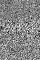

In [543]:
n_c = 400
comps = np.argsort(-1*np.abs(w))[:n_c]
proj = D_eig[:n_c,:]
test_im = imag_arr[0,:]
# rec = ((proj.T@(proj@test_im))+np.mean(imag_arr, axis=0)).reshape((dims[1], dims[0]))
rec = (proj.T@(proj@test_im)).reshape((dims[1], dims[0]))
print(rec)
Image.fromarray(np.uint8(scale(rec)))

[[ 88.92060596  93.27631023  95.87363194 ...  31.08430215  29.72428408
   28.54660583]
 [ 86.8012817   91.35568039  91.69692119 ...  29.16842799  26.34760866
   25.4582613 ]
 [ 83.35164284  86.18368107  84.30657846 ...  29.413407    23.62524834
   21.78888125]
 ...
 [ 83.4864986   69.82595547  79.57138949 ... 131.75926885 163.28162525
  165.78699356]
 [ 70.05196734  64.94589235  82.64574866 ... 137.77306566 165.17164156
  166.24980292]
 [ 61.58285813  62.27797219  84.96066252 ... 141.3498322  164.33868988
  164.59799326]]


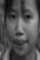

In [542]:
n_c = 400
proj = D[:n_c,:]
test_im = imag_arr[0,:]
rec = ((proj.T@(proj@test_im))+np.mean(imag_arr, axis=0)).reshape((dims[1], dims[0]))
rec = (proj.T@(proj@test_im)).reshape((dims[1], dims[0]))
print(rec)
Image.fromarray(np.uint8(rec))

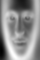

In [508]:
def scale(arr):
    return 255*(arr-np.min(arr))/(np.max(arr)-np.min(arr))
# Image.fromarray(np.uint8(D[1,:]).reshape(dims[1],dims[0]))
Image.fromarray(np.uint8(scale(D[5,:])).reshape(dims[1],dims[0]))

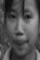

In [493]:
images[0]

In [484]:
rec

array([[ 89.74491079,  86.95773464,  86.23249658, ...,  86.99501061,
         88.67279327,  91.86345398],
       [ 89.34507735,  86.85824678,  86.32769218, ...,  87.08140539,
         88.37546881,  91.49980539],
       [ 89.13006652,  86.73743089,  86.64948763, ...,  87.04110348,
         88.24918279,  91.10020465],
       ...,
       [108.60957089, 108.03186369, 107.32457681, ..., 107.24056852,
        107.98049465, 108.66084029],
       [108.25795716, 107.8602669 , 107.33880091, ..., 107.29614313,
        107.77133696, 108.44592901],
       [107.93513932, 107.51611634, 107.12135627, ..., 107.22319959,
        107.54947842, 108.14727148]])

In [406]:
(proj.T@(test_im@proj)).shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1500 is different from 2400)

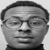

In [206]:
Image.fromarray(np.uint8(imag_arr[3,:].reshape(50,50)))

In [249]:
np.argmax(np.abs(w))

2499

In [503]:
255*D[4,:]

array([  8.60767467,   8.1293819 ,   6.61637366, ..., -10.42399639,
       -10.89898312, -10.99819138])

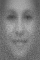

In [444]:
Image.fromarray(np.uint8(np.mean(imag_arr, axis=0) + 255*D[6,:]).reshape(dims[1], dims[0]))

In [65]:
D[:,0]

array([-0.02044449+0.j, -0.01783256+0.j, -0.02044449+0.j, ...,
       -0.02014646+0.j, -0.02038187+0.j, -0.02017757+0.j])